In [1]:
from utility_bffitter import *
from utility_dfplotter import *
from utility_dfcounter import *

# 1.Fit the Counts

In [2]:
fitter = Fitter()
fitter.fit()
sigma, corr = fitter.paramSigma()

for i in range(3):
    c,s = fitter.paramML[i], sigma[i]
    print('{:6.4f} +/- {:6.4f}'.format(c*100,s*100 ))

10.8843 +/- 0.2339
10.8615 +/- 0.2270
10.4204 +/- 0.7613


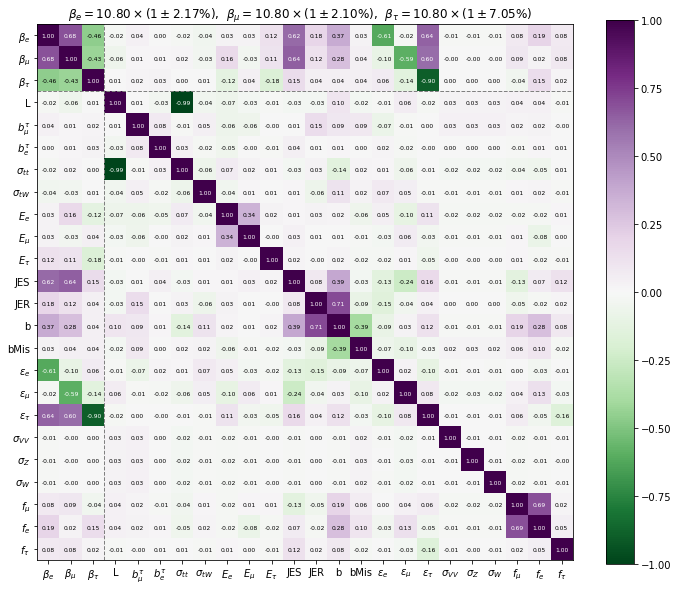

In [3]:
# make plots
lablesName = [r'$\beta_e$',r'$\beta_\mu$',r'$\beta_\tau$',
              "L",r"$b^\tau_\mu$",r"$b^\tau_e$",
              r"$\sigma_{tt}$",r"$\sigma_{tW}$",
              r"$E_e$",r"$E_\mu$",r"$E_\tau$",
              "JES","JER","b","bMis",
              r"$\epsilon_e$",r"$\epsilon_\mu$",r"$\epsilon_\tau$",
              r"$\sigma_{VV}$",r"$\sigma_{Z}$",r"$\sigma_{W}$",
              r"$f_{\mu}$",r"$f_{e}$",r"$f_{\tau}$",
              ]

lablesPos = np.arange(0,len(lablesName),1)  

plt.figure(figsize=(12,10),facecolor='w')
plt.imshow(corr,cmap='PRGn_r',vmax=1,vmin=-1)
plt.xticks(lablesPos,lablesName)
plt.yticks(lablesPos,lablesName)
for i in lablesPos:
    for j in lablesPos:
        value = corr[i,j]
        if abs(value)>0.5:
            fcolor = 'w'
        else:
            fcolor = 'k'
            
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(corr[i,j]),fontsize=6,color=fcolor )
plt.colorbar()
plt.axvline(2.5,color='grey',linewidth=1,linestyle='--')
plt.axhline(2.5,color='grey',linewidth=1,linestyle='--')

plt.title(r'$\beta_e   =10.80\times(1\pm${:4.2f}%),  '.format(sigma[0]/0.1080*100) + 
          r'$\beta_\mu =10.80\times(1\pm${:4.2f}%),  '.format(sigma[1]/0.1080*100) + 
          r'$\beta_\tau=10.80\times(1\pm${:4.2f}%)   '.format(sigma[2]/0.1080*100),
          fontsize=12
         )
plt.savefig('../plots/combine/covarMatrix_theta_yield.png',dpi=300)

In [4]:
# print out paramters
for i in range(sigma.size):
    l = lablesName[i]
    mean = fitter.paramML[i]
    std = sigma[i]
    if i <3:
        mean = 10.80
        std *= 100
    print('{:15}:  {:6.3f} +/-{:6.3f}'.format(l,mean,std))

$\beta_e$      :  10.800 +/- 0.234
$\beta_\mu$    :  10.800 +/- 0.227
$\beta_\tau$   :  10.800 +/- 0.761
L              :  -0.087 +/- 0.574
$b^\tau_\mu$   :  -0.002 +/- 1.016
$b^\tau_e$     :   0.016 +/- 0.937
$\sigma_{tt}$  :   0.130 +/- 0.753
$\sigma_{tW}$  :  -0.210 +/- 0.930
$E_e$          :  -0.147 +/- 0.677
$E_\mu$        :  -0.057 +/- 0.956
$E_\tau$       :   0.039 +/- 1.004
JES            :  -0.389 +/- 0.611
JER            :   0.029 +/- 1.028
b              :   0.033 +/- 0.056
bMis           :  -1.569 +/- 0.935
$\epsilon_e$   :  -0.712 +/- 0.980
$\epsilon_\mu$ :  -0.516 +/- 1.002
$\epsilon_\tau$:   0.148 +/- 0.907
$\sigma_{VV}$  :  -0.112 +/- 0.997
$\sigma_{Z}$   :  -0.112 +/- 0.998
$\sigma_{W}$   :  -0.112 +/- 0.997
$f_{\mu}$      :   2.072 +/- 0.815
$f_{e}$        :  -0.114 +/- 0.576
$f_{\tau}$     :   0.080 +/- 0.952


# 2. Plot Histogram

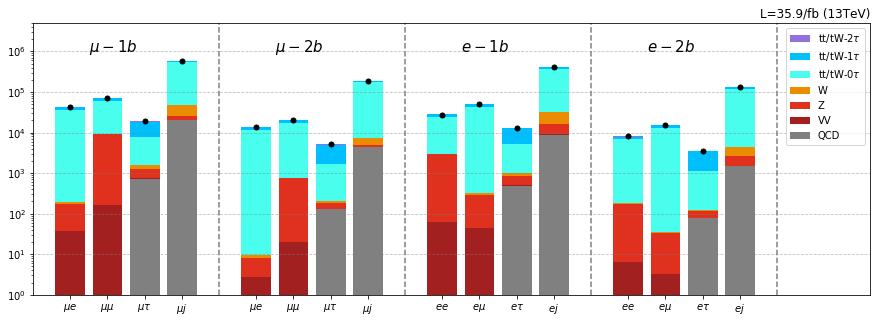

In [5]:
plotCountsSummary ( fitter.count0 )
plt.savefig('../plots/summary_yields.png',dpi=300)